In [21]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from catboost import CatBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    roc_auc_score,
    roc_curve,
    precision_recall_curve,
    f1_score,
    precision_score,
    accuracy_score,
    recall_score
)

warnings.filterwarnings('ignore')


In [22]:
seed = 42
np.random.seed(seed)

### 1. Loading Data

In [23]:
X_train = np.load('Artifacts/X_train.npz')['arr_0']
Y_train = np.load('Artifacts/Y_train.npz')['arr_0']
X_test = np.load('Artifacts/X_test.npz')['arr_0']
Y_test = np.load('Artifacts/Y_test.npz')['arr_0']

### 2. Model Training

In [24]:
model_cat = CatBoostClassifier(
    learning_rate = 0.1,
    l2_leaf_reg = 3,
    iterations = 500,
    depth = 3,
    border_count = 32
)
model_cat.fit(X_train,Y_train)

0:	learn: 0.6576357	total: 2.95ms	remaining: 1.47s
1:	learn: 0.6328139	total: 5.9ms	remaining: 1.47s
2:	learn: 0.6093466	total: 42.9ms	remaining: 7.11s
3:	learn: 0.5886957	total: 46.5ms	remaining: 5.76s
4:	learn: 0.5709952	total: 50ms	remaining: 4.95s
5:	learn: 0.5565460	total: 53.5ms	remaining: 4.41s
6:	learn: 0.5443606	total: 58.4ms	remaining: 4.11s
7:	learn: 0.5343271	total: 60.7ms	remaining: 3.74s
8:	learn: 0.5277278	total: 63.1ms	remaining: 3.44s
9:	learn: 0.5207111	total: 65.3ms	remaining: 3.2s
10:	learn: 0.5143224	total: 67.4ms	remaining: 3s
11:	learn: 0.5084698	total: 80.4ms	remaining: 3.27s
12:	learn: 0.5025343	total: 82.7ms	remaining: 3.1s
13:	learn: 0.4980752	total: 85.2ms	remaining: 2.96s
14:	learn: 0.4941576	total: 87.5ms	remaining: 2.83s
15:	learn: 0.4910285	total: 90.1ms	remaining: 2.72s
16:	learn: 0.4847065	total: 92.4ms	remaining: 2.63s
17:	learn: 0.4816858	total: 94.5ms	remaining: 2.53s
18:	learn: 0.4791627	total: 96.5ms	remaining: 2.44s
19:	learn: 0.4769220	total: 98

### 3. Inference

In [25]:
Y_hat_train = model_cat.predict(X_train)
Y_hat_test = model_cat.predict(X_test)

Y_proba_train = model_cat.predict_proba(X_train)
Y_proba_test = model_cat.predict_proba(X_test)

In [26]:
pd.Series(Y_test).value_counts()

0    1036
1     373
Name: count, dtype: int64

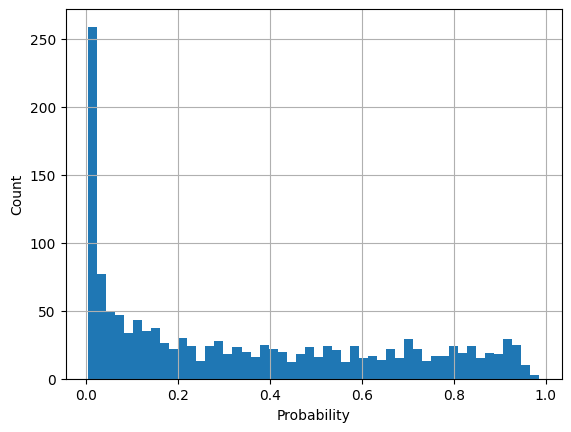

In [27]:
Y_cat_test = Y_proba_test[:,1]

plt.hist(Y_cat_test, bins =50)
plt.xlabel('Probability')
plt.ylabel('Count')
plt.grid()
plt.show()

### 4. Evaluation

In [28]:
Y_hat_test = Y_cat_test > 0.6
Y_hat_test

array([ True, False, False, ..., False, False,  True])

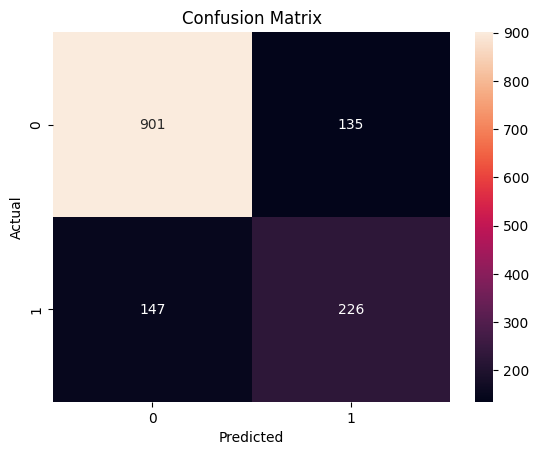

In [29]:
cm = confusion_matrix(Y_test, Y_hat_test)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()